# Transfer Learning VGG 16 and VGG 19 using Keras


In [1]:
!pip install streamlit

In [2]:
# import the libraries as shown below
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import streamlit as st

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
train_path

'Datasets/train'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
folders 

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [10]:
len(folders)

3

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\icon\AppData\Local\Temp\ipykernel_8260\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 64s 43s/step - loss: 7.6530 - accuracy: 0.3750 - val_loss: 4.2776 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 48s 35s/step - loss: 4.2257 - accuracy: 0.3906 - val_loss: 11.6457 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 47s 34s/step - loss: 7.0371 - accuracy: 0.4062 - val_loss: 12.5502 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 48s 34s/step - loss: 8.3264 - accuracy: 0.3906 - val_loss: 8.6126 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 48s 35s/step - loss: 4.6716 - accuracy: 0.4688 - val_loss: 4.3867 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 48s 35s/step - loss: 2.6398 - accuracy: 0.4375 - val_loss: 4.1652 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 48s 35s/step - loss: 4.6793 - accuracy: 0.3750 - val_loss: 1.8747 - val_accuracy: 0.5690
Epoch 8/50
2/2 [=========

In [19]:
r.history

{'loss': [7.652956485748291,
  4.225716590881348,
  7.037135124206543,
  8.32641315460205,
  4.671578407287598,
  2.6398468017578125,
  4.679322242736816,
  2.045653820037842,
  2.4750912189483643,
  3.0961177349090576,
  1.4450585842132568,
  1.4175082445144653,
  1.5978138446807861,
  0.809094250202179,
  1.224523663520813,
  0.6562114357948303,
  0.8379049301147461,
  0.6465436220169067,
  0.7527804374694824,
  0.5014044642448425,
  0.497969388961792,
  0.46347564458847046,
  0.4538220763206482,
  0.5003302097320557,
  0.4449518918991089,
  0.45230454206466675,
  0.33301836252212524,
  0.3496445417404175,
  0.2793343663215637,
  0.3583500385284424,
  0.3347024917602539,
  0.2743971347808838,
  0.3573034703731537,
  0.28723302483558655,
  0.3314420282840729,
  0.2693812847137451,
  0.2903199791908264,
  0.30779996514320374,
  0.2571277618408203,
  0.28031712770462036,
  0.2255428433418274,
  0.27918151021003723,
  0.2280372977256775,
  0.2234097123146057,
  0.2763884663581848,
  0.22

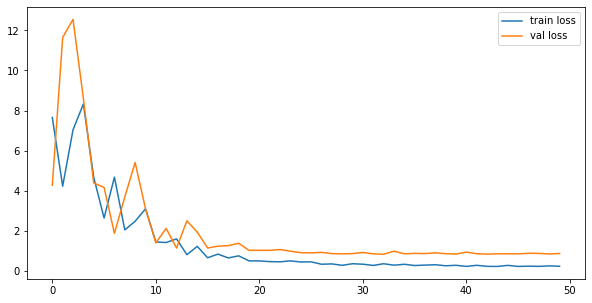

<Figure size 432x288 with 0 Axes>

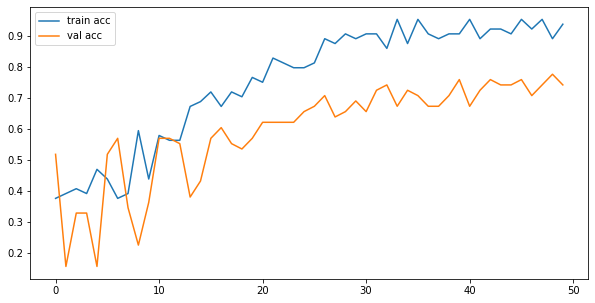

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.figure(figsize=(10,5))
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.figure(figsize=(10,5))
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [22]:
y_pred = model.predict(test_set)

2/2 [==============================] - 54s 30s/step


In [23]:
y_pred

array([[7.38081560e-02, 5.67518294e-01, 3.58673543e-01],
       [9.17417943e-01, 4.77399044e-02, 3.48421447e-02],
       [2.17554435e-01, 3.49661469e-01, 4.32784081e-01],
       [1.16654672e-02, 9.35168028e-01, 5.31664416e-02],
       [3.16020548e-02, 8.13173175e-01, 1.55224830e-01],
       [4.33703631e-01, 2.43855432e-01, 3.22440952e-01],
       [1.31797060e-01, 1.40281573e-01, 7.27921367e-01],
       [3.41335088e-02, 6.38985813e-01, 3.26880664e-01],
       [4.93726917e-02, 6.05026424e-01, 3.45600873e-01],
       [3.93670452e-05, 4.68284416e-04, 9.99492288e-01],
       [2.00838279e-02, 5.99894941e-01, 3.80021304e-01],
       [8.44872653e-01, 9.62493569e-03, 1.45502418e-01],
       [1.43517658e-01, 1.68343186e-02, 8.39648068e-01],
       [6.10706583e-02, 8.51859868e-01, 8.70695561e-02],
       [1.05921149e-01, 5.44931972e-03, 8.88629556e-01],
       [2.75887996e-05, 2.13341461e-03, 9.97839034e-01],
       [6.18112572e-02, 2.84216493e-01, 6.53972268e-01],
       [1.34206146e-01, 4.61770

In [24]:
import numpy as np 
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2,
       2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')

In [28]:
# img_data

In [30]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [31]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\icon\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\preprocessing\\image\\__init__.py'>

In [32]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.7607843 , 0.7372549 , 0.68235296],
        [0.84313726, 0.81960785, 0.77254903],
        [0.94509804, 0.92156863, 0.8745098 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.96862745, 0.9607843 , 0.9137255 ],
        [0.9607843 , 0.9490196 , 0.9137255 ],
        [0.95686275, 0.94509804, 0.9098039 ]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.972549  , 0.94509804],
        [0.95686275, 0.98039216, 0.972549  ],
        [0.95686275, 0.98039216, 0.972549  ]],

       ...,

       [[0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[0.05724832, 0.06046605, 0.88228565]], dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 465ms/step


In [38]:
a

array([2], dtype=int64)

In [39]:
a==1

array([False])